<a href="https://colab.research.google.com/github/Alex112525/Neural-networks-fundamentals/blob/main/Classifying_numbers_with_Keras_(first_neural_network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt 

# Import the dataset

The MNIST (Modified National Institute of Standards and Technology) database is a large database of handwritten digits that is commonly used for training and testing machine learning algorithms. It contains 60,000 training images and 10,000 testing images of handwritten digits, with each image being 28x28 pixels in size.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data.shape

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

9


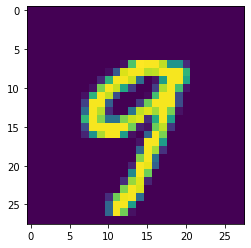

In [ ]:
img = 45
plt.imshow(train_data[img])
print(train_labels[img])

Change the shape of the tensor to two dimensions, and modify the values to go from 0 to 1

In [ ]:
Train = train_data.reshape((60000, 28*28))
Train = Train.astype("float32")/255

Test = test_data.reshape((10000, 28*28))
Test = Test.astype("float32")/255

Encode the outputs using onehot encoding

In [ ]:
Encoding_train = to_categorical(train_labels)
Encoding_test = to_categorical(test_labels)
Encoding_train[img]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#Build Neural Network

We build the neural network with an input of 28*28
and an output of 10 (the 10 digits of the dataset).

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10, activation="softmax", ))

The **compile** method takes the following arguments:

* optimizer: This is the optimization algorithm that the model will use to adjust its weights during training. 
  * In this case, it's set to "rmsprop", which is a variant of the gradient descent algorithm.

* loss: This argument specifies the loss function that the model will use to evaluate its performance during training. 
  * In this case, it's set to "categorical_crossentropy", which is a commonly used loss function for multiclass classification problems.

* metrics: This argument specifies the metric(s) that the model will use to evaluate its performance during training and testing. 
  * In this case, it's set to "accuracy", which is a commonly used metric for evaluating the accuracy of a classifier.

In [ ]:
model.compile(optimizer = "rmsprop", 
              loss="categorical_crossentropy", 
              metrics="accuracy")

The summary() function is used to create a summary protocol buffer that contains metadata for a TensorFlow computation graph.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#Train

The inputs to the fit method are:

* Train: The training data, typically a NumPy array or a pandas dataframe.
* Encoding_train: The target or label data for the training set, typically also a NumPy array or a pandas dataframe.
* epochs: The number of iterations the model will train for.
* batch_size: The number of samples per gradient update for the model to use when training.

So, in this case, the model will train for 5 epochs, with a batch size of 128, using the rmsprop optimizer and the categorical cross-entropy loss function.

In [ ]:
model.fit(Train, Encoding_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2537 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1047 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0373 - accuracy: 0.9890


#Evaluate 

Accuracy is a commonly used metric in machine learning to evaluate the performance of a model on a dataset. It measures the fraction of predictions made by the model that are correct. It is a popular choice for supervised learning problems with a balanced dataset, where each class has roughly equal numbers of samples.

In [ ]:
model.evaluate(Test, Encoding_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0761 - accuracy: 0.9773


[0.07606951892375946, 0.9772999882698059]